# Vraag 1

## Business Understanding
In de nieuwe Zwolse wijk Stadshagen heeft het RIVM een groot aantal sensoren opgehangen om de luchtkwaliteit te meten. Bij deze vraag gaan we aan de slag met de data-analyse.

### Vraag 1a (6 punten)
Plaats de meetgegevens uit de database (`opgave1_2020.sqlite`) in een DataFrame. Haal alleen de gegevens m.b.t. de sensoren `PZ020`, `PZ021`, `PZ013` op uit de aangeleverde sqlite-database.

- Controleer vervolgens of het DataFrame de juiste gegevens bevat door het aantal rijen en het aantal variabelen te controleren. 
- Een tweede check is om te kijken naar de eerste paar regels van het ingelezen bestand.  


In [1]:
# Importeer hier de benodigde modules en daarna de data
import sqlite3
import pandas as pd

conn = sqlite3.connect('opgave1_2020.sqlite')
df = pd.read_sql("select * from dataset where label in ('PZ020', 'PZ021', 'PZ013')", conn)

In [2]:
df.head()

,label,value_NO2,unit_NO2,value_PM10,unit_PM10,value_RH,unit_RH,value_P,unit_P,time
0,PZ013,10.9572,ug/m3,62.76,ug/m3,69.97,%,1020.00,hPa,2018-12-10 10:00:00+00:00
1,PZ013,10.4434,ug/m3,62.76,ug/m3,63.41,%,1020.00,hPa,2018-12-10 11:00:00+00:00
2,PZ013,10.4434,ug/m3,812.24,ug/m3,72.41,%,1020.00,hPa,2018-12-10 12:00:00+00:00
3,PZ013,12.1020,ug/m3,846.31,ug/m3,72.41,%,1020.00,hPa,2018-12-10 13:00:00+00:00
4,PZ013,11.6998,ug/m3,53.97,ug/m3,72.15,%,1020.76,hPa,2018-12-10 14:00:00+00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16303 entries, 0 to 16302
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       16303 non-null  object 
 1   value_NO2   16303 non-null  float64
 2   unit_NO2    16303 non-null  object 
 3   value_PM10  16303 non-null  float64
 4   unit_PM10   16303 non-null  object 
 5   value_RH    16303 non-null  float64
 6   unit_RH     16303 non-null  object 
 7   value_P     16303 non-null  float64
 8   unit_P      16303 non-null  object 
 9   time        16303 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


[**Antwoord**] 

* Inlezen = +4pt
* Filteren binnen SQL = +2pt
* Filteren met Pandas = +0pt

In DB browser for Sqlite zien we m.b.v. filteren dat er voor sensor `PS020` 4064 records zijn, voor `PZ021` 5172 records en voor `PZ013` 14045 records. In totaal zijn dit 23281 records met deze drie sensoren. Dit is hetzelfde aantal rijen als het DataFrame. Het inlezen is dus gelukt

### Vraag 1b  (6 punten)

Verrijk de dataset van vraag 1a met de gegevens uit het csv bestand `opgave1_2021.csv`. Dit bevat meetgegevens vanaf 2020. 

- Filter wederom op de sensoren `PZ020`, `PZ021`, `PZ013`
- Voeg de data uit de twee databronnen samen tot één bron
- Controleer op basis van het aantal kolommen en records of alles goed is gegaan, of corrigeer anders

In [4]:
df_2021 = pd.read_csv('opgave1_2021.csv')

In [5]:
df_2021.columns

Index([' label', 'value_NO2', 'unit_NO2', 'value_PM10', 'unit_PM10',
       'value_RH', 'unit_RH', 'value_P', 'unit_P', 'timestamp'],
      dtype='object')

In [6]:
df_2021 = df_2021.rename(columns={'timestamp':'time', ' label':'label'})

In [7]:
df_2021 = df_2021[df_2021['label'].isin(['PZ020', 'PZ021', 'PZ013'])].copy()

In [8]:
df_final = pd.concat([df, df_2021])

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26068 entries, 0 to 22281
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       26068 non-null  object 
 1   value_NO2   26068 non-null  float64
 2   unit_NO2    26068 non-null  object 
 3   value_PM10  26068 non-null  float64
 4   unit_PM10   26068 non-null  object 
 5   value_RH    26068 non-null  float64
 6   unit_RH     26068 non-null  object 
 7   value_P     26068 non-null  float64
 8   unit_P      26068 non-null  object 
 9   time        26068 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.2+ MB


In [10]:
df_final.shape, df.shape, df_2021.shape

((26068, 10), (16303, 10), (9765, 10))

In [11]:
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value_NO2,26068.0,12.582987,10.175482,0.005611,6.763822,11.8169,16.435875,458.444
value_PM10,26068.0,30.680213,144.134379,0.000000,7.155405,11.4842,18.817400,3979.090
value_RH,26068.0,57.626903,18.845918,9.390000,40.360000,60.3300,72.610000,100.000
value_P,26068.0,1013.848608,23.885063,442.890000,1007.575000,1015.0000,1022.000000,1172.910


[**Antwoord**]

- Data inlezen = +2pt
- Mergen = +2pt
- De kolommen correct hernoemen: +2pt (+1pt per kolom)

## Vraag 1c (2 punten)
De opdrachtgever wil een paar feitjes weten uit nieuwsgierigheid. 

- Wat zijn het gemiddelde en de mediaan van de `value_NO2` kolom?
- Wat zijn de minimale en maximale tijdstippen in de dataset?

In [12]:
df_final['value_NO2'].describe().transpose()[['mean', '50%']]

mean    12.582987
50%     11.816900
Name: value_NO2, dtype: float64

In [13]:
df_final['time'].min(), df_final['time'].max()

('2018-12-10 10:00:00+00:00', '2021-06-04 07:00:00+00:00')

[**Antwoord**]

- Gemiddelde en mediaan correct: +1pt
- Minimale en maximale tijd correct: +1pt

## Vraag 1d

[**Antwoord**]
VRAAG VERVALT

# Vraag 2
Een hogeschool heeft jullie de vraag gesteld of je op basis van de cijfers die zijn behaald op twee andere vakken en de uren die zijn besteed aan het vak kunt bepalen welke leerlingen een vak wel en welke niet slagen dat vak.

De data is te vinden in `vraag2.csv`. 


## Opgave 2a (5 punten)
Lees het csv-bestand in en 
- sorteer de juiste kolommen in de variabelen indep_var en dep_var als voorbereiding op het aanmaken van de train- en testset.
- verdeel de data in een train- en een test-set.
    - Zorg ervoor dat 30% van de data in de test-set terecht komt.

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np

# Lieve collega's, let op dat er vaak spaties in veldnamen en kolomnamen zullen staan!
data = pd.read_csv('Vraag 2 (decision tree)/vraag2.csv', index_col=0)


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 977
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cijfer1    978 non-null    float64
 1   cijfer2    978 non-null    float64
 2   uren       978 non-null    int64  
 3   resultaat  978 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 38.2+ KB


In [3]:
data.head()

,cijfer1,cijfer2,uren,resultaat
0,8.8,7.8,107,gezakt
1,9.2,7.7,100,geslaagd
2,8.6,7.1,97,gezakt
3,9.2,5.7,99,geslaagd
4,8.3,6.4,111,gezakt


In [4]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cijfer1,978.0,NaN,NaN,NaN,8.990286,0.428654,7.3,8.7,9.1,9.4,10.0
cijfer2,978.0,NaN,NaN,NaN,6.773006,1.008321,3.5,6.1,6.8,7.5,10.0
uren,978.0,NaN,NaN,NaN,100.484663,10.079737,69.0,93.0,100.0,108.0,137.0
resultaat,978,2,gezakt,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Splitsen in dependent en independent
dep_var = data[['resultaat']]
indep_vars=data.drop(['resultaat'], axis=1)

In [6]:
dep_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 977
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   resultaat  978 non-null    object
dtypes: object(1)
memory usage: 15.3+ KB


In [7]:
indep_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 977
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cijfer1  978 non-null    float64
 1   cijfer2  978 non-null    float64
 2   uren     978 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 30.6 KB


In [8]:
from sklearn.model_selection import train_test_split 
indep_var_train, indep_var_test, dep_var_train, dep_var_test = train_test_split(indep_vars, dep_var, test_size=0.3)

[punten]
- splitsen in indepedent en dependent variabelen (+3 punten)
- splitsen in test- en train (+2 punten)
- niet 30% testset (-1 punt)

## opgave 2b (8 punten)

We gaan nu een decision tree fitten aan de data die we ingeladen hebben.

Bouw met behulp van een decision tree een model dat voorspelt welke student slaagt voor het vak op basis van de eerdere cijfers en de bestede uren.


In [9]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix                                                                              

<Figure size 1800x576 with 0 Axes>

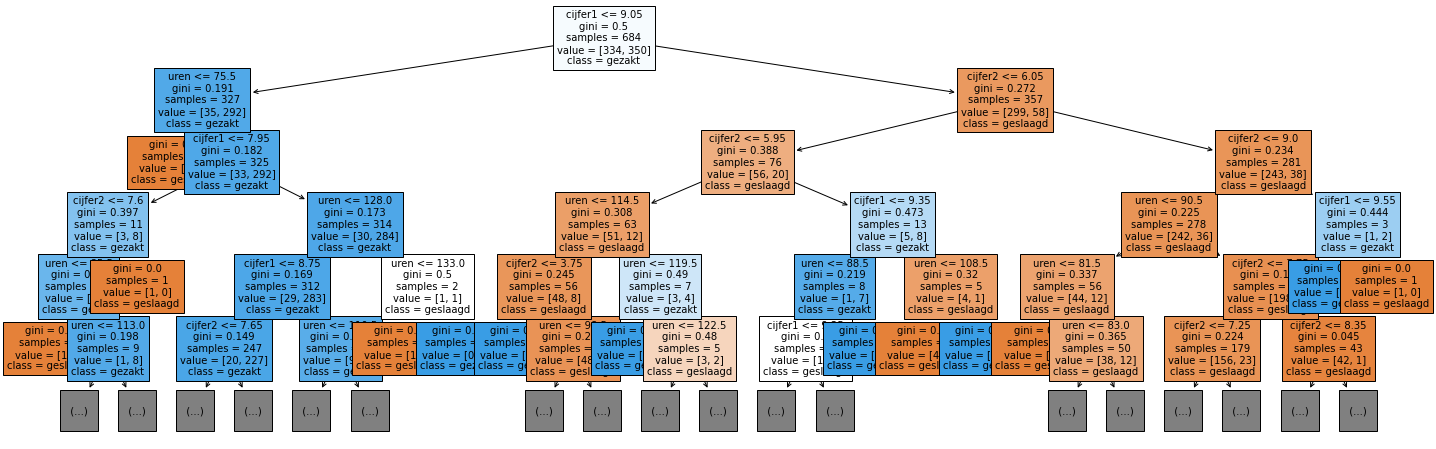

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,8))  # set plot size (denoted in inches)
clf = DecisionTreeClassifier().fit(indep_var_train, dep_var_train) 
                    
ignore_output = tree.plot_tree(clf, 
                               max_depth = 5,
                               fontsize=10,
                               filled = True, 
                               class_names = ['geslaagd', 'gezakt'],  # LET OP: Dit is altijd in alfabetische volgorde
                               feature_names = indep_vars.columns)

In [21]:
# Uitleg eerste scheiding gaat op variabele cijfer <= 9.05

[antwoord]
- +2 punten indien juiste data is gebruikt
- +2 punten indien model goed is gedraaid
- +2 punten indien beslisboom is gevisualiseerd
- +2 punten indien conclusie is getrokken over eerste stap

## Opgave 2c (7 punten)
Beoordeel de performance van het model met behulp van een confusion matrix en f1_score.

In [23]:
f1 = f1_score(dep_var_test, clf.predict(indep_var_test), pos_label='geslaagd')
f1

0.7536231884057971

In [32]:
dep_var_test['resultaat'].value_counts()

gezakt      150
geslaagd    144
Name: resultaat, dtype: int64

In [34]:
cm = pd.DataFrame(confusion_matrix(dep_var_test, clf.predict(indep_var_test)), 
                 columns=['geslaagd', 'gezakt'], # LET OP: Dit is altijd in alfabetische volgorde
                 index=['geslaagd', 'gezakt'])   # LET OP: Dit is altijd in alfabetische volgorde
    

In [35]:
# Regulier CM
cm

,geslaagd,gezakt
geslaagd,104,40
gezakt,28,122


In [36]:
# Genormaliseerd CM
cm.transpose() / cm.sum(axis=1).transpose()

,geslaagd,gezakt
geslaagd,0.722222,0.186667
gezakt,0.277778,0.813333


In [ ]:
# Conclusie: f1_score is ok, het model kan wel redelijk het verschil al zien tussen gezakt/geslaagd.  

[punten]
- +2 confusion matrix (beide versies zijn goed). Ook crosstab mag hier gebruikt worden
- +2 punten f1 score
- +3 punten interpretratie en conclusie
- cross-label verkeerd -1 punt

# Vraag 3: K-means

## Business understanding
We hebben een dataset aangeleverd gekregen met details van energieaansluitingen van een aantal huizen. Kunnen we hier clusters in onderscheiden? 

## Data Understanding (geen punten)
De data die nodig is voor deze analyse is aangeleverd in het bestand `vraag3.csv`. Importeer deze data hier.

[**Antwoord**] 

In [1]:
import pandas as pd

df = pd.read_csv('vraag3.csv')
df.head()

,WOONPLAATS,AANSLUITINGEN_AANTAL,SOORT_AANSLUITING_PERC,SJA_GEMIDDELD,SJA_LAAG_TARIEF_PERC,SLIMME_METER_PERC
0,HAREN GN,22,86.36,5022.73,47.76,100.00
1,ZWOLLE,10,100.00,2158.20,41.21,90.00
2,WESTERHAAR-VRIEZENV WIJK,24,70.83,5767.75,46.90,100.00
3,TEN POST,13,61.54,4525.00,41.07,92.31
4,PUTTE,15,53.33,3626.40,56.59,93.33


[**Antwoord**] 
Geen punten hiervoor

## Data Preparation

### Vraag 3a (5 punten)
We willen de numerieke data normaliseren voordat we gaan clusteren. Door de aard van de data willen we dit doen op het gemiddelde en de standaarddeviatie en niet op de min/max methode. 
- Maak een kopie van je dataframe zonder de woonplaats
- Trek daarvan het gemiddelde van elke kolom af 
- Deel daarna het resultaat daarna door de standaarddeviatie

[**Antwoord**] 

In [2]:
df_normalised = df.drop(columns=['WOONPLAATS'])

In [3]:
df_normalised = df_normalised - df_normalised.mean()
df_normalised = df_normalised / df_normalised.std()
df_normalised.head()

,AANSLUITINGEN_AANTAL,SOORT_AANSLUITING_PERC,SJA_GEMIDDELD,SJA_LAAG_TARIEF_PERC,SLIMME_METER_PERC
0,0.031117,1.046813,0.245324,0.156160,0.887811
1,-0.909916,1.775776,-0.628835,-0.664622,0.035500
2,0.187956,0.216842,0.472679,0.048393,0.887811
3,-0.674658,-0.279644,0.093433,-0.682165,0.232384
4,-0.517819,-0.718411,-0.180790,1.262648,0.319320


[**Antwoord**] 
* Kopie van dataframe zonder `WOONPLAATS`: +2pt
* Normalisatie met mean en std: +3pt
* Normalisatie verkeerd, want met min/max: +0pt

### Vraag 3b (6 punten)
Doe een Elbow analyse om het optimaal aantal clusters te kiezen. Hoeveel clusters kies je en waarom? Test alle opties tussen de 1 t/m 5 clusters.

_Is het je niet gelukt om te normaliseren? Draai dan je analyse op de ongenormaliseerde data_

<AxesSubplot:>

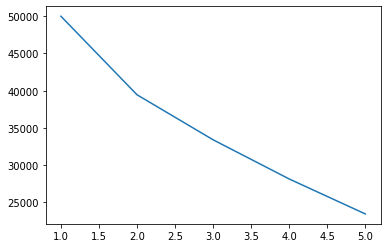

In [4]:
from sklearn.cluster import KMeans

cluster_options = [1,2,3,4,5]
inertia_vs_no_clusters = []
for no_clusters in cluster_options:
    kmeans = KMeans(n_clusters=no_clusters)
    inertia_vs_no_clusters.append(kmeans.fit(df_normalised).inertia_)
    
pd.Series(inertia_vs_no_clusters, index=cluster_options).plot()

[**Antwoord**] 
* Clustering op dataframe: +2pt 
* Elbowplot: +2pt
* Conclusie dat twee clusters het beste is, want daar zit de knik: +2pt

### Vraag 3c (6 punten)
Draai de clustering op het aantal clusters dat je bij de vorige vraag hebt gevonden. Gebruik hiervoor je genormaliseerde dataset. Voeg vervolgens je clusterlabels toe aan de oorspronkelijke dataset. Maak een pairplot van de oorspronkelijke data waarbij de kleur van het puntje overeenkomt met het label.

_Als het niet gelukt is om de Kmeans te maken, geef hier dan een pairplot zonder dat de kleur overeenkomt met het clusterlabel_

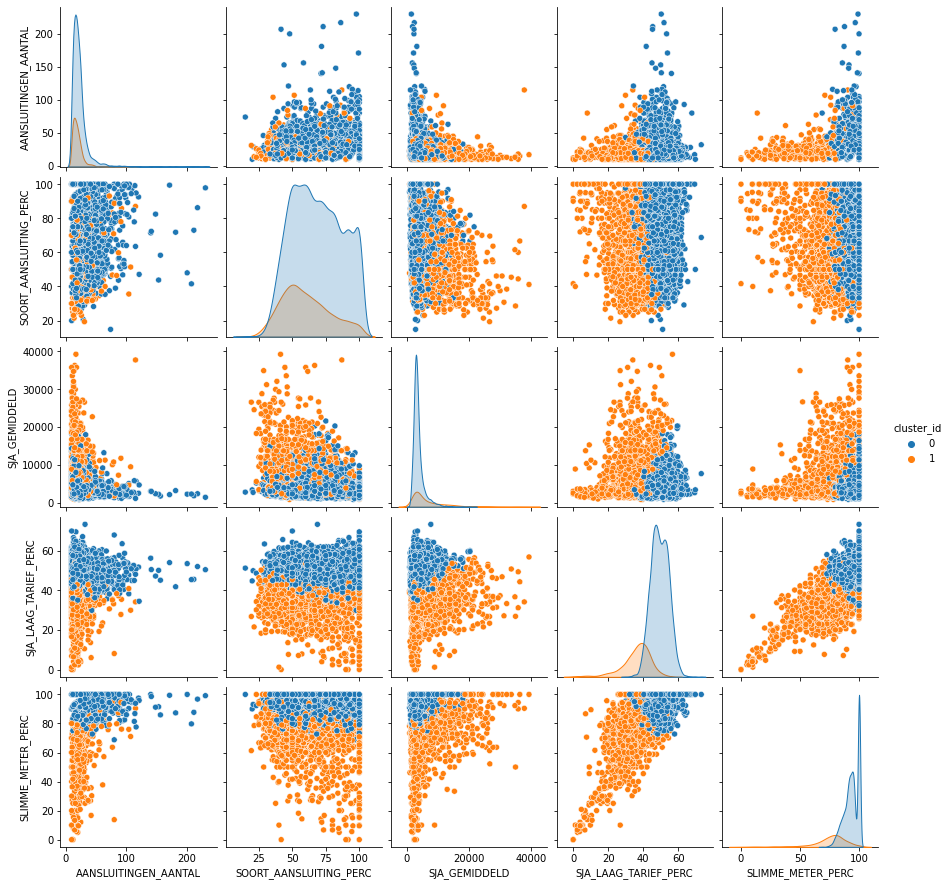

In [5]:
import seaborn as sns

model = KMeans(n_clusters=2).fit(df_normalised)
df['cluster_id'] = model.labels_
sns.pairplot(df, hue='cluster_id')

[**Antwoord**] 
* Clustering op genormaliseerde data: +2pt
* Pairplot maken: +2pt
* Correct kleurcodering: +2pt
* Indien niet de oorspronkelijke data maar de genormaliseerde data wordt getoond: 2pt aftrek

## Evaluation
### Vraag 3d (3 punten)
Bereken in één tabel de gemiddelde waardes per cluster voor kolom `SLIMME_METER_PERC`. In welk cluster zijn de procentueel de meeste slimme meters?

In [6]:
df.groupby('cluster_id').mean()['SLIMME_METER_PERC']

cluster_id
0    93.534626
1    74.940998
Name: SLIMME_METER_PERC, dtype: float64

[**Antwoord**] 
* Gemiddeldes van de twee clusters geproduceerd in één tabel: +2pt
* Benoemen welk cluster de meeste heeft: +1pt

# Vraag 4

## Business understanding
We willen graag inzicht in de groei van kinderen tussen de 24 en 60 maanden zodat we kunnen voorspellen hoe groot een kind in een bepaalde maand zou moeten zijn. 

## Data understanding
### Vraag 4a (5 punten)
De klant heeft de data aangeleverd als een excel bestand (`vraag4.xlsx`):

- Lees het bestand in
- verken de data
- Bereken en visualiseer de correlaties

------------------------
**Antwoord**

In [25]:
import pandas as pd
data = pd.read_excel('vraag4.xlsx')

In [10]:
data.head()

,Month,Height,Sex
0,24,86,Girl
1,25,87,Girl
2,26,87,Girl
3,27,88,Girl
4,28,89,Girl


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   481 non-null    int64 
 1   Height  481 non-null    int64 
 2   Sex     481 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.4+ KB


In [12]:
data.describe()

,Month,Height
count,481.000000,481.000000
mean,42.000000,99.004158
std,10.688194,7.053957
min,24.000000,84.000000
25%,33.000000,94.000000
50%,42.000000,100.000000
75%,51.000000,104.000000
max,60.000000,114.000000


<AxesSubplot:>

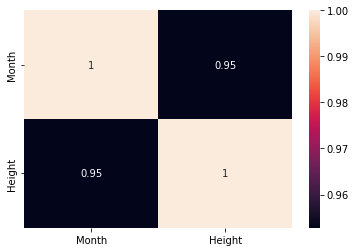

In [14]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True)

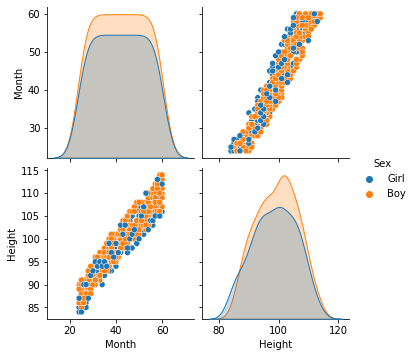

In [24]:
sns.pairplot(data, hue='Sex') #Hue optioneel

Punten score verdeling:
- +2 punten voor de correlatie berekenen
- +3 punten voor de correlatie in de heatmap tonen (alleen indien het cijfer ook is weergegeven)

# Modeling

### Vraag 4b (10 punten)
Op basis van de sterke correlatie verwachten we dat leeftijd in maanden een belangrijke voorspeller is voor de lengte van een kind. Bouw een linear regressiemodel tussen `Height` en `Month`. Train het model op 70% van de data (gebruikt random_state 42), en gebruik de rest van de data als testdata. 

- Laat als resultaat de summary zien en de $R^2$ op basis van de *test*data. 
- Laat dit model een verband zien tussen `Height` en `Month`? Betrek bij je antwoord de $R^2$ op basis van de trainingsdata, de $R^2$ op basis van de testdata en de P > |t| kolom uit de summary. 
- Vul op basis van het model de volgende zin aan: 'Een kind van 26 maanden heeft een voorspelde lengte van ... cm (<u> geef hierbij ook de berekening!</u>)'

--------------------
**Antwoord**

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split (data, test_size=0.3, random_state=42)
train_data.head()

,Month,Height,Sex
60,47,103,Boy
110,60,106,Girl
459,39,96,Girl
379,33,95,Boy
29,53,106,Girl


In [19]:
from statsmodels.formula.api import ols
model=ols("Height ~ Month", data=train_data).fit()
print(model.summary())
print("R-Squared on test_data:", (test_data['Height'].corr(model.predict(test_data)))**2)

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     3009.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          4.06e-169
Time:                        13:12:59   Log-Likelihood:                -742.08
No. Observations:                 336   AIC:                             1488.
Df Residuals:                     334   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8779      0.494    147.559      0.0

Er is een sterk verband tussen `height` en `Month` gezien de $R^2$ van 0.9. De $R^2$ voor de test data laat een vergelijkbare waarde zien met een $R^2$ van 0.92, wat bevestigd dat we iig nog niet aan het overfitten zijn. Beide coefficienten zijn significant/betrouwbaar, want de nulhypothese wordt overtuigend verworpen `P>|t|` van 0.000. 

Een kind van 26 maanden heeft een lengte van 72.9 + 26x0.62 = 89.06cm

- +1 punt voor train_test_split
- +1 punt voor correct uitvoeren OLS
- +2 punt voor correcte interpretatie van P>|t|
- +4 punten voor correcte interpretatie van R^2 op basis van testdata (+2 punten indien op basis van enkel de traindata)
- +2 punten voor correct uitrekenen kind van 26 maanden (zonder berekening is 0 punten)

## Vraag 4c (6 punten)
We vermoeden dat naast `Month` ook het geslacht van invloed is op de lengte van een kind. Breidt het model van 4b uit met de variabele `Sex`. 

- Geef als output van dit model in ieder geval de berekende coëfficiënten, de intercept, de R-squared op basis van de traindata en de R-squared op basis van de testdata.
- Wat is het verschil in lengte tussen jongens en meisjes?

In [26]:
model=ols("Height ~ Month + C(Sex)", data=train_data).fit()
print(model.summary())
print("R-Squared on test_data:", (test_data['Height'].corr(model.predict(test_data)))**2)

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1545.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          3.08e-169
Time:                        14:57:53   Log-Likelihood:                -737.53
No. Observations:                 336   AIC:                             1481.
Df Residuals:                     333   BIC:                             1493.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         73.1850      0.498    146.

Meisjes zijn 0.7 cm korter dan jongen.


- +3 punten voor correct invoeren categorische variabele `c(Sex)`. Ook `Sex` geeft een categorische behandeling en is dus correct. 
- +3 punten voor correct antwoord op de vraag over meisjes

# Evaluation (4 punten)

### Vraag 4d
Als je kijkt naar de modellen bij 4b en 4c, welke zou je adviseren aan de klant? Onderbouw je antwoord vanuit de uitkomst van de analyses.

------------------------------------------
**Antwoord**

Je ziet dat de R^2 op de test data in het model van 4c maar heel beperkt toeneemt van ruwweg 0.924 naar 0.927. Op de train_data zien we een vergelijkbare toename (0.900 - 0.903). Hoewel het geslacht met een P>|t| van 0.003 duidelijk wel een significant effect heeft zou ik kiezen voor het model van vraag b omdat er nauwelijks sprake is van een toename in R^2 voor zowel de test als de train data.  

- +3 punten uitleg weinig verschil in R^2's van op zowel train als testdata (alleen train of alleen test genoemd 1 punt)
- +1 punten voor benoemen `GIRL` wel significant effect
- uiteindelijke conclusie model a of b maakt niet uit

# Vraag 5: Tijdreeksen
## Business understanding
Het CBS heeft het aantal verstrekte uitkeringen in de sociale zekerheid voor de periode vanaf 1900 verzameld.  Ze hebben jou gevraagd om een tijdsserie model te maken voor de verstrekte AOW-uitkeringen.

## Data Understanding
De klant heeft een csv bestand aangeleverd tot 1935 per vijf jaar en daarna per jaar.

## Vraag 5a (2 punten)
Importeer de data, zorg ervoor 

- dat Perioden de index van het DataFrame wordt. 

In [28]:
import pandas as pd

In [29]:
data=pd.read_csv('vraag5.csv',delimiter=',')
data.set_index('Perioden', inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1900 to 2020
Data columns (total 8 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Uitkeringen sociale zekerheid/Ziektewet (x 1 000)                      84 non-null     float64
 1   Uitkeringen sociale zekerheid/Arbeidsongeschiktheid (x 1 000)          92 non-null     float64
 2   Uitkeringen sociale zekerheid/Werkloosheid/WW (x 1 000)                69 non-null     float64
 3   Uitkeringen sociale zekerheid/Werkloosheid/WWV (x 1 000)               24 non-null     float64
 4   Uitkeringen sociale zekerheid/AOW (x 1 000)                            74 non-null     float64
 5   Uitkeringen sociale zekerheid/Anw (x 1 000)                            62 non-null     float64
 6   Uitkeringen sociale zekerheid/AKW/Gerechtigden (x 1 000)               80 non-null     f

In [31]:
data.columns

Index(['Uitkeringen sociale zekerheid/Ziektewet (x 1 000)',
       'Uitkeringen sociale zekerheid/Arbeidsongeschiktheid (x 1 000)',
       'Uitkeringen sociale zekerheid/Werkloosheid/WW (x 1 000)',
       'Uitkeringen sociale zekerheid/Werkloosheid/WWV (x 1 000)',
       'Uitkeringen sociale zekerheid/AOW (x 1 000)',
       'Uitkeringen sociale zekerheid/Anw (x 1 000)',
       'Uitkeringen sociale zekerheid/AKW/Gerechtigden (x 1 000)',
       'Uitkeringen sociale zekerheid/Algemene bijstandsuitkeringen (x 1 000)'],
      dtype='object')

In [32]:
data.head()

,Uitkeringen sociale zekerheid/Ziektewet (x 1 000),Uitkeringen sociale zekerheid/Arbeidsongeschiktheid (x 1 000),Uitkeringen sociale zekerheid/Werkloosheid/WW (x 1 000),Uitkeringen sociale zekerheid/Werkloosheid/WWV (x 1 000),Uitkeringen sociale zekerheid/AOW (x 1 000),Uitkeringen sociale zekerheid/Anw (x 1 000),Uitkeringen sociale zekerheid/AKW/Gerechtigden (x 1 000),Uitkeringen sociale zekerheid/Algemene bijstandsuitkeringen (x 1 000)
Perioden,,,,,,,,
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1910,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1915,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#data=data.rename(columns={'Uitkeringen sociale zekerheid/AOW (x 1 000)':'AOWuitkeringen'})

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1900 to 2020
Data columns (total 8 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Uitkeringen sociale zekerheid/Ziektewet (x 1 000)                      84 non-null     float64
 1   Uitkeringen sociale zekerheid/Arbeidsongeschiktheid (x 1 000)          92 non-null     float64
 2   Uitkeringen sociale zekerheid/Werkloosheid/WW (x 1 000)                69 non-null     float64
 3   Uitkeringen sociale zekerheid/Werkloosheid/WWV (x 1 000)               24 non-null     float64
 4   Uitkeringen sociale zekerheid/AOW (x 1 000)                            74 non-null     float64
 5   Uitkeringen sociale zekerheid/Anw (x 1 000)                            62 non-null     float64
 6   Uitkeringen sociale zekerheid/AKW/Gerechtigden (x 1 000)               80 non-null     f

**Antwoord**

- +2 punten indien data correct is geïmporteerd met Perioden als de index

### Vraag 5b (2 punten)
Maak een plot van deze tijdsserie. 

-------------------
**Antwoord**

<AxesSubplot:xlabel='Perioden'>

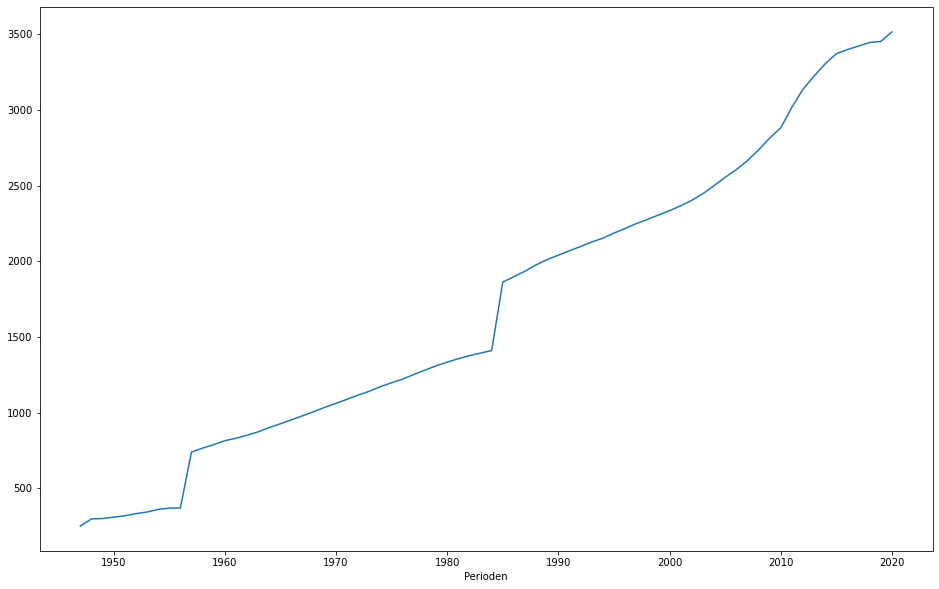

In [35]:
data['Uitkeringen sociale zekerheid/AOW (x 1 000)'].plot(figsize=(16,10))

**Antwoord**
- +2 punten indien correcte lijnplot met waarden op de y-as en perioden op de x-as

### Vraag 5c (6 punten)
Bepaal hoeveel AR-componenten het best is voor de data die je door de klant gegeven is. Onderbouw je antwoord. 

--------------------------------------------
**Antwoord**

In [ ]:
data['Uitkeringen sociale zekerheid/AOW (x 1 000)'].diff().plot(figsize=(16,10))

In [ ]:
# [5 min] Voer de ADFuller-test uit voor elke afgeleide totdat het resultaat statistisch significant is. 
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Uitkeringen sociale zekerheid/AOW (x 1 000)'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
# [5 min] Voer de ADFuller-test uit voor elke afgeleide totdat het resultaat statistisch significant is. 
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Uitkeringen sociale zekerheid/AOW (x 1 000)'].diff().dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In de koers van het aandeel Apple lijkt geen terugkerend patroon te zitten. Dit betekent dat we geen `lag`-parameter hoeven in te stellen. 

In [ ]:
plot_acf(data['Uitkeringen sociale zekerheid/AOW (x 1 000)'].diff().dropna())

Naast de zero-lag liggen er geen componenten buiten de blauwe zone. We kiezen hier dus voor 0 AR componenten. 

**Antwoord**
- +2 punten voor I component
- +2 punten voor AR component
- +2 punten voor MA component